# Математическая статистика
## Практическое задание 3

В данном задании рассматриваются свойства условного математического ожидания. В частности, рассматривается модель смеси гауссовских распределений.

**Правила:**

* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 3"`. Квадратные скобки обязательны. Вместо `Фамилия Имя` нужно подставить свои фамилию и имя.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `3.N.ipynb` и `3.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Никакой код из данного задания при проверке запускаться не будет.
* Некоторые задачи отмечены символом <font size="5" color="red">\*</font>. Эти задачи являются дополнительными. Успешное выполнение большей части таких задач (за все задания) является необходимым условием получения бонусного балла за практическую часть курса.
* Баллы за каждую задачу указаны далее. Если сумма баллов за задание меньше 25% (без учета доп. задач), то все задание оценивается в 0 баллов.


**Баллы за задание:**

* Задача 1 - 3 балла
* Задача 2 - 1 балл
* Задача 3 - 2 балла
* Задача 4 - 7 баллов
* Задача 5<font size="5" color="red">\*</font> - 10 баллов

In [246]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import math


**Задача 1.** На вероятностном пространстве $\left(\mathbb{R}_+, \mathcal{B}(\mathbb{R}_+), \mathsf{P}\right)$, где $\mathsf{P}$ --- экспоненциальное распределение с параметром $\lambda$, задана случайная величина $\xi$ по правилу $\xi(\omega) = \omega$. Cигма-алгебра $\mathcal{G}$ порождена счетной системой событий $\{B_n\}_{n\geq1},$ где $B_n = \{n-1\leq \omega<n\}.$. Для $\omega \in [0, 5]$ постройте графики 
* плотности распределения $\mathsf{P}$ для $\lambda \in \{1, 3, 10\}$
* $\xi$ и $\mathsf{E}(\xi | \mathcal{G})$ как функции от $\omega$ для $\lambda \in \{1, 3, 10\}$
* $\xi^2$ и $\mathsf{E}(\xi^2 | \mathcal{G})$ как функции от $\omega$ для $\lambda \in \{1, 3, 10\}$

Используйте приведенный ниже шаблон. Одному и тому же значению $\lambda$ во всех графиках должен соответствовать один и тот же цвет.

Выполним расчёты (такая задача была разобрана на семинаре).

$\mathsf{E}(\xi | \mathcal{G}) = \sum{ \frac{\mathsf{E}(\xi \mathsf{I}(n-1 \leq \omega < n))}{\mathsf{P}(n-1 \leq \omega < n)} } \mathsf{I}(n-1 \leq \omega < n)$

$\frac{\mathsf{E}(\xi \mathsf{I}(n-1 \leq \omega < n))}{\mathsf{P}(n-1 \leq \omega < n)}  =
\frac{
    \int\limits_{n-1}^{n} { x \lambda e^{ -x \lambda} } dx
    }{
    \int\limits_{n-1}^{n} {\lambda e^{ -x \lambda} } dx
    }
=
\frac{e^\lambda (n \lambda - \lambda + 1) -n \lambda  - 1}{(e^\lambda - 1) \lambda}$




$\mathsf{E}(\xi^2 | \mathcal{G}) = \sum{ \frac{\mathsf{E}(\xi^2 \mathsf{I}(n-1 \leq \omega < n))}{\mathsf{P}(n-1 \leq \omega < n)} } \mathsf{I}(n-1 \leq \omega < n)$

$\frac{\mathsf{E}(\xi^2 \mathsf{I}(n-1 \leq \omega < n))}{\mathsf{P}(n-1 \leq \omega < n)}  =
\frac{
    \int\limits_{n-1}^{n} { x^2 \lambda e^{ -x \lambda} } dx
    }{
    \int\limits_{n-1}^{n} {\lambda e^{ -x \lambda} } dx
    }
=
\frac{n^2 e^\lambda \lambda^2 - n^2 \lambda^2 - 2 n e^\lambda \lambda^2 + 2 n e^\lambda \lambda - 2 n y + e^\lambda \lambda^2 - 2 e^\lambda \lambda + 2 e^\lambda - 2}{(e^\lambda - 1) \lambda^2}$


In [247]:
def E1(l, n):
    n = np.floor(n)
    e = math.exp(1.)
    return ((e**l) * (n * l - l + 1.) - n*l - 1.) / ((e**l - 1.) * l)

def E2(l, n):
    n = np.floor(n)
    e = math.exp(1.)
    return ((n**2)*(e**l)*(l**2) - (n**2)*(l**2) - 2*n*(e**l)*(l**2)
            + 2*n*(e**l)*l - 2*n*l + (e**l)*(l**2) - 2*(e**l)*l
            + 2*(e**l) - 2)/(((e**l) - 1)*(l**2))

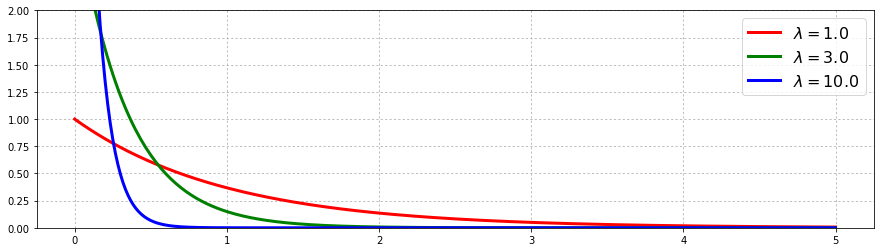

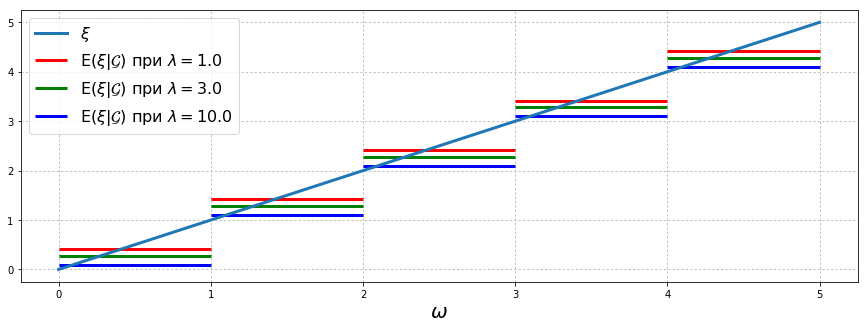

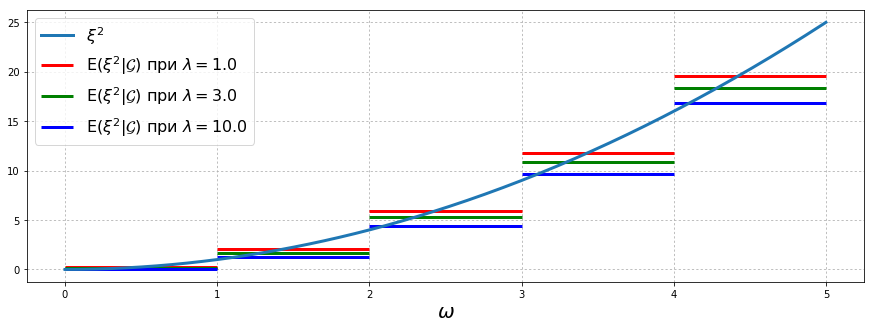

In [467]:
lambdas = ((1., "red"), (3., "green"), (10.0, "blue"))
grid = np.linspace(0., 5., 300)

# График 1
plt.figure(figsize=(15, 4))
for l, color in lambdas:
    plt.plot(grid, sps.expon(scale=1./l).pdf(grid), lw=3,
             color=color, label='$\\lambda={}$'.format(l))
plt.legend(fontsize=16)
plt.ylim((0, 2))
plt.grid(ls=':')
plt.show()

# График 2
plt.figure(figsize=(15, 5))
plt.plot(grid, grid, lw=3, label='$\\xi$')
for l, color in lambdas:
    for i in range(1, 6):  # события из сигма-алгебры
        plt.hlines(E1(l, i), i-1, i, color=color, lw=3,
            label=('$\\mathsf{E}(\\xi|\\mathcal{G})$ при $\\lambda = '
            + str(l) + '$') if i == 1 else '')
plt.xlabel('$\\omega$', fontsize=20)
plt.legend(fontsize=16)
plt.grid(ls=':')
plt.show()

# График 3 для \\xi^2 аналогичен графику 2
plt.figure(figsize=(15, 5))
plt.plot(grid, grid**2, lw=3, label='$\\xi^2$')
for l, color in lambdas:
    for i in range(1, 6):  # события из сигма-алгебры
        plt.hlines(E2(l, i), i-1, i, color=color, lw=3,
            label=('$\\mathsf{E}(\\xi^2|\\mathcal{G})$ при $\\lambda = '
            + str(l) + '$') if i == 1 else '')
plt.xlabel('$\\omega$', fontsize=20)
plt.legend(fontsize=16)
plt.grid(ls=':')
plt.show()



**Вывод:**
Мы визуализировали условное матожидание по разбиению. Для одного множества из разбиения условное матожидание выглядит так, как бы выглядело матожидание величины, определённой только на этом множестве, что выглядит логичным. При этом условное матожидание содержит в себе информацию об исходном распределении.

**Задача 2.** 
Пусть $\xi = (\xi_1, \xi_2) \sim \mathcal{N}(a, \Sigma)$, где $a=0$ и $\Sigma = \begin{pmatrix}10 & 8 \\ 8 & 10\end{pmatrix}$. Для $y \in \{-3, 0, 1, 5\}$ постройте графики условной плотности $f_{\left.\xi_1\right|\xi_2} \left(x\left|y\right.\right)$.

$\rho_{\xi|\eta}(x | y) = 
\begin{equation*}
 \begin{cases}
   \frac{\rho_{(\xi, \eta)}(x, y)}{\rho_{\eta(y)}} &\rho_{\eta(y)} \neq 0
   \\
   0 &\rho_{\eta(y)} = 0
 \end{cases}
\end{equation*}$$
$

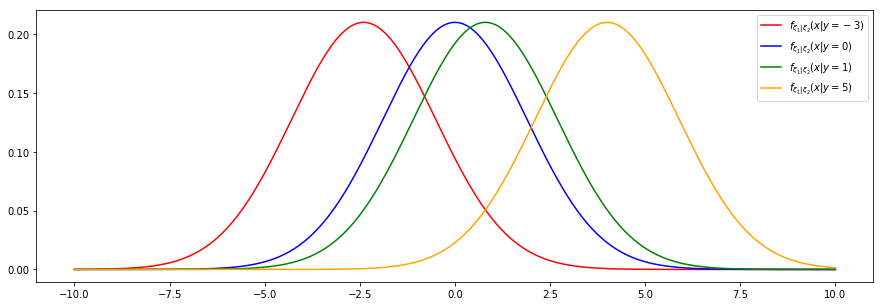

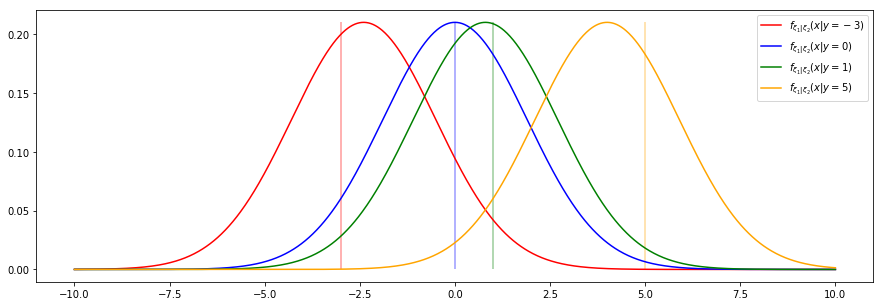

In [67]:
ys = (
    (-3., "red"), 
    (0., "blue"),
    (1., "green"),
    (5., "orange")
)
grid = np.linspace(-10., +10, 1000)
mean = (0., 0.)
cov = ((10., 8.), (8., 10.))

def plot(lines=False):
    plt.figure(figsize=(15, 5))
    for y, color in ys:
        ygrid = np.array(list(zip(grid, np.ones(grid.size) * y)))
        pdf = (sps.multivariate_normal(mean=(0., 0.), cov=cov).pdf(ygrid) /
                sps.norm(mean[1], math.sqrt(cov[1][1])).pdf(y))
        label = "$f_{\\left.\\xi_1\\right|\\xi_2} \\left(x\\left|y = %d\\right.\\right)$" % (y)
        if lines:
            plt.vlines(y, 0., pdf.max(), color=color, alpha=0.4)
        plt.plot(grid, pdf, color=color, label=label)
    plt.legend()
    plt.show()

plot(False)
plot(True)

**Вывод:**
Условные плотности для одной составляющей при условии равенства другой состовляющей некоторой контстанте похожи на плотности одномерного нормального распределения, при том, что при $y = 0$ $(a = (0, 0))$ матожидание условной плотности равно $y$; при $y < 0$ матожидание условного распределения $> y$; при $y > 0$ матожидание условного распределения $< y$. (вертикальные линии - соответствующие y)

**Задача 3.**
Имеется множество серверов, которые периодически выходят из строя. 
Обозначим $\xi_i$ время между $i$-м моментом выхода из строя сервера и $(i+1)$-м.
Известно, что величины $\xi_i$ независимы в совокупности и имеют экспоненциальное распределение с параметром $\lambda$.

Обозначим $N_t$ --- количество серверов, которые вышли из строя к моменту времени $t$ (в начальный момент времени $N_0 = 0$).
В курсе случайных процессов будет доказано, что для любых $s < t$ величина $N_t - N_s \sim Pois(\lambda (t - s))$ и независима с $N_s$.
При этом $N_t$ как функция от $t$ будет называться пуассоновским процессом интенсивности $\lambda$.

Вам нужно знать, сколько серверов нужно докупить к моменту времени $t$ взамен вышедших из строя.
В момент времени $s$ предсказанием количества серверов, вышедших из строя к моменту времени $t$, будем считать величину $\mathsf{E}( N_t | N_s)$.

Сгенерируйте выборку случайных величин $\xi_i$ для $\lambda = 1/4$ в количестве, чтобы их сумма была больше 100.
Для $t=100$ постройте графики зависимости величины $\mathsf{E}( N_t | N_s)$ от $s$ в предополжении, что условное математическое ожидание было посчитано при значении $\lambda \in \{1/10, 1/4, 1/2, 1\}$. Нарисуйте также на графике горизонтальную прямую уровня $N_{100}$.

$\mathsf{E}( N_t | N_s = k)
= \sum\limits_{N_t = 0}^{+\inf} N_t P(N_t | N_s = k)
= \sum\limits_{N_t = 0}^{+\inf} N_t \frac{P(N_t \bigcap N_s = k)}{P(N_s = k)}$

$
= \sum\limits_{N_t = 0}^{+\inf} N_t \frac{P((N_t - N_s) = (N_t - k) \bigcap N_s = k)}{P(N_s = k)}
= \sum\limits_{N_t = 0}^{+\inf} N_t \frac{P((N_t - N_s) = (N_t - k)) P(N_s = k)}{P(N_s = k)}
= \sum\limits_{N_t = 0}^{+\inf} N_t P((N_t - N_s) = (N_t - k))$

$
= \sum\limits_{N_t = 0}^{+\inf} N_t P((N_t - N_s) = (N_t - k)) + k - k
= \sum\limits_{N_t = 0}^{+\inf} (N_t - k) P((N_t - N_s) = (N_t - k)) + k$

$
= Pois(\lambda (t-s)).mean() + k
= \lambda (t-s) + k
$

In [212]:
xi = sps.expon(scale =  1. / (1./4.)).rvs(size=50)
while (xi.sum() <= 100.): # low propability
    xi = sps.expon(scale = 1. / (1./4.)).rvs(size=50)
# print(xi.sum())
# print(xi)

def N(i):
    sumTime, Ni = 0., 0
    while (sumTime <= i):
        sumTime += xi[Ni]
        Ni += 1
    return Ni - 1

# print(N(0), N(xi[0] - 1e-10), N(100))


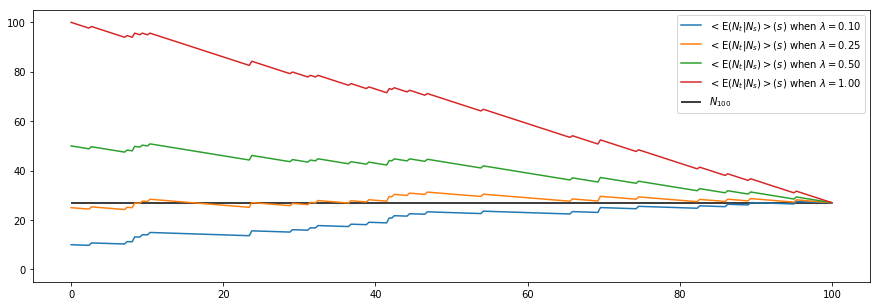

In [216]:
ls = (1./10., 1./4., 1./2., 1.)
grid = np.linspace(0, 100, 300)
t = 100
plt.figure(figsize = (15, 5))
plt.hlines(N(100), 0, 100, label="$N_{100}$")
for l in ls:
    # Pois(\lambda * (t - s)).mean() = \lambda * (t - s) TODO REFACT
    Es = [sps.poisson(mu=l*(t - s)).mean() + N(s) for s in grid]
    label="$<\\mathsf{E}( N_t | N_s)>(s)$ when $\\lambda = %.2f$" % (l)
    plt.plot(grid, Es, label=label)
plt.legend()
plt.ylim((-5, 105))
plt.show()

**Вывод:**
Выбирая точное значение $\lambda$ мы можем достаточно точно предсказать число компьютеров, которое нужно докупить. Это видно на примере жёлтой ломаной на графике.

**Задача 4.** 
Рассмотрим модель смеси многомерных гауссовских распределений, то есть распределение, имеющее плотность $p(x) = \sum\limits_{k=1}^K p_k(x) \mathsf{P}(T = k),$ где $T$ --- случайная величина, принимающая значения $\{1, ..., K\}$ и имеющая смысл номера компоненты смеси, а $p_k(x)$ --- плотность распределения $N(a_k, \Sigma_k)$.


Загрузите датасет "Ирисы Фишера", используя следующий код.

In [208]:
from sklearn.datasets import load_iris
data = load_iris()
data['data']  # выборка
data['target']  # номера компонент смеси

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

В предположении, что каждый класс имеет гауссовское распределение, оцените его параметры. Используйте для этого функции `numpy.mean` и `numpy.cov`. Проверьте, что матрица ковариаций получилась правильной --- возможно, придется предварительно поменять порядок осей (транспонировать). Напечатайте полученные оценки.

In [209]:
data['data'].shape
cl = [[data.data[i] for i in range(data.data.shape[0]) if (data.target[i] == k)]
          for k in range(data.target.min(), data.target.max() + 1)]
cl = np.array(cl)
print(cl.shape)
means = cl.mean(axis = 1)
covs = np.array([np.cov(cl[i].T) for i in range(cl.shape[0])])

for i in range(means.shape[0]):
    print("Class ", i, ":")
    print("Mean:\n", means[i])
    print("Cov:\n", covs[i], "\n")

(3, 50, 4)
Class  0 :
Mean:
 [ 5.006  3.418  1.464  0.244]
Cov:
 [[ 0.12424898  0.10029796  0.01613878  0.01054694]
 [ 0.10029796  0.14517959  0.01168163  0.01143673]
 [ 0.01613878  0.01168163  0.03010612  0.00569796]
 [ 0.01054694  0.01143673  0.00569796  0.01149388]] 

Class  1 :
Mean:
 [ 5.936  2.77   4.26   1.326]
Cov:
 [[ 0.26643265  0.08518367  0.18289796  0.05577959]
 [ 0.08518367  0.09846939  0.08265306  0.04120408]
 [ 0.18289796  0.08265306  0.22081633  0.07310204]
 [ 0.05577959  0.04120408  0.07310204  0.03910612]] 

Class  2 :
Mean:
 [ 6.588  2.974  5.552  2.026]
Cov:
 [[ 0.40434286  0.09376327  0.3032898   0.04909388]
 [ 0.09376327  0.10400408  0.07137959  0.04762857]
 [ 0.3032898   0.07137959  0.30458776  0.04882449]
 [ 0.04909388  0.04762857  0.04882449  0.07543265]] 



Нарисуйте график плотности (тепловую карту) в проекции на первые две координаты и нанесите на график точки выборки. При выполнении задания полезно вспомнить решение части 3 задачи 1 задания 1. Используйте шаблон ниже.

(3, 618, 404)
(618, 404)


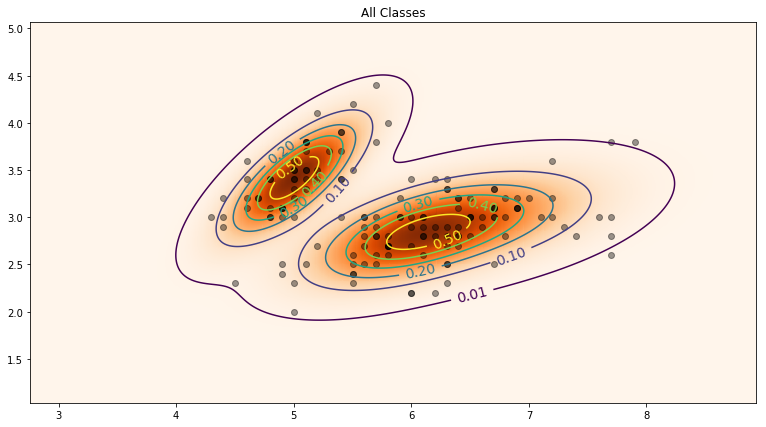

In [471]:
I = np.array([0, 1])  # это можно передавать в качестве индексов
mean = means[cl_id, :2]
cov = covs[cl_id, :2, :2]

meanx = cl[:, :, 0].mean();
dx = abs(cl[:, :, 0].max() - meanx) * 1.5

meany = cl[:, :, 1].mean();
dy = abs(cl[:, :, 1].max() - meany) * 1.5

grid = np.mgrid[(meanx - dx):(meanx + dx):0.01,
                (meany - dy):(meany + dy):0.01]

x, y = grid
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x # Здесь нет циклов!
pos[:, :, 1] = y

ax = (0, 1)
def meanI(i):
    return (means[i, ax[0]], means[i, ax[1]])

def covI(i):
    return (
        (covs[i, ax[0], ax[0]], covs[i, ax[0], ax[1]]),
        (covs[i, ax[1], ax[0]], covs[i, ax[1], ax[1]])
    )

distribs_eq_01 = [sps.multivariate_normal(mean=meanI(i), cov=covI(i))
                      for i in range(means.shape[0])]

density = np.array([distr.pdf(pos) for distr in distribs_eq_01])
print(density.shape)
density = density.mean(axis=0)
print(density.shape)

plt.figure(figsize=(13, 7))
plt.title("All Classes")
plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
plt.scatter(cl[:, :, 0], cl[:, :, 1], alpha=0.4, color="black")
CS = plt.contour(grid[0], grid[1],
                 density, [0.01, 0.1, 0.2, 0.3, 0.4, 0.5])
plt.clabel(CS, fontsize=14, inline=1, fmt='%1.2f', cmap='Set3')
plt.show()

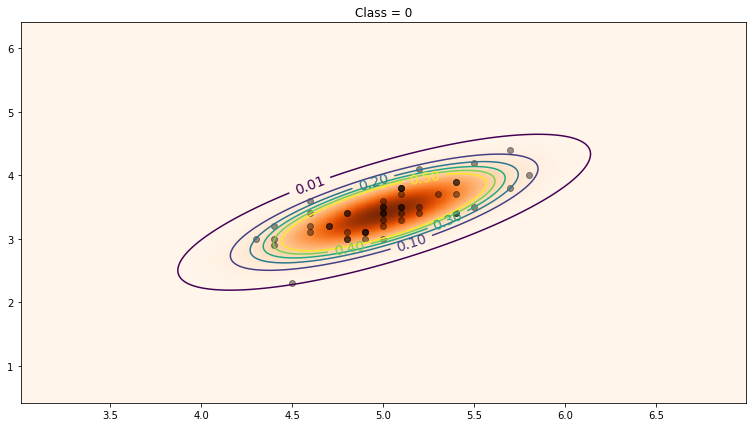

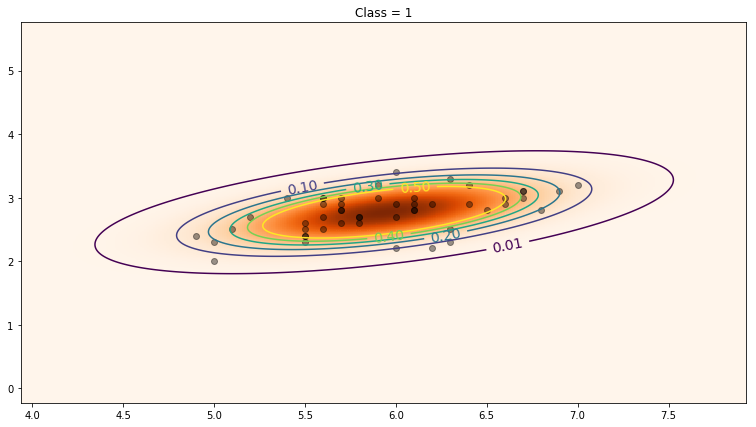

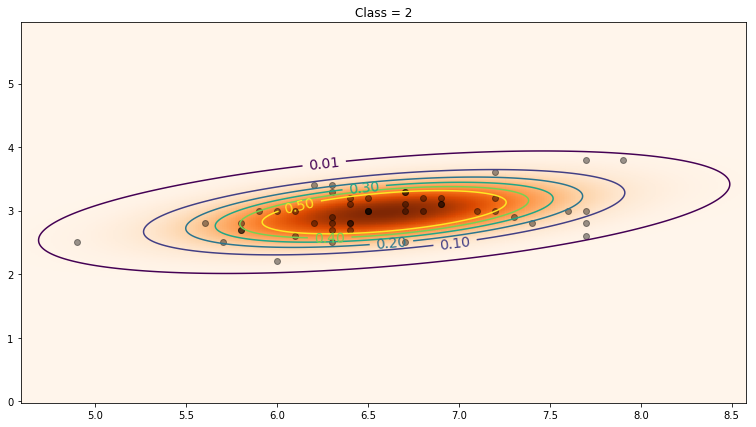

In [470]:
for cl_id in range(cl.shape[0]):
    mean = means[cl_id, :2]
    cov = covs[cl_id, :2, :2]
    w = 2.
    h = 3.
    grid = np.mgrid[(mean[0] - w):(mean[0] + w):0.01,
                    (mean[1] - h):(mean[1] + h):0.01]

    x, y = grid
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x # Здесь нет циклов!
    pos[:, :, 1] = y

    density = np.array(sps.multivariate_normal(mean=mean, cov=cov).pdf(pos))

    plt.figure(figsize=(13, 7))
    plt.title("Class = %d" % (cl_id))
    plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
    plt.scatter(cl[cl_id, :, 0], cl[cl_id, :, 1], alpha=0.4, color="black")
    CS = plt.contour(grid[0], grid[1], density, [0.01, 0.1, 0.2, 0.3, 0.4, 0.5])
    plt.clabel(CS, fontsize=14, inline=1, fmt='%1.2f', cmap='Set3')
    plt.show()

Вычислите условное математическое ожидание $\mathsf{E}( X | I\{T \not= k\} = 1)$ для всех $k = 1,2,3$, где $X$ --- случайный вектор, имеющий распределение смеси.
Постройте графики условной плотности $p_{X|I\{T \not= k\}}\left(x \left| 1\right.\right)$ в проекции на первые две координаты. Подберите хорошие значения линий уровня.

In [425]:
cl01 = np.append(cl[0], cl[1], axis=0)
cl02 = np.append(cl[0], cl[2], axis=0)
cl12 = np.append(cl[1], cl[2], axis=0)
clNEk = np.array([cl12, cl02, cl01]) # Not Equal k
# print(cl01.shape, cl[0].shape, cl[1].shape)
# print(cl02.shape, cl[0].shape, cl[2].shape)
# print(cl12.shape, cl[1].shape, cl[2].shape)
for i, cli in enumerate(clNEk):
    print("E(X | I{T !=", i, "} = 1) = ", cli.mean(axis=0))


E(X | I{T != 0 } = 1) =  [ 6.262  2.872  4.906  1.676]
E(X | I{T != 1 } = 1) =  [ 5.797  3.196  3.508  1.135]
E(X | I{T != 2 } = 1) =  [ 5.471  3.094  2.862  0.785]


[[ 6.262  2.872  4.906  1.676]
 [ 5.797  3.196  3.508  1.135]
 [ 5.471  3.094  2.862  0.785]]


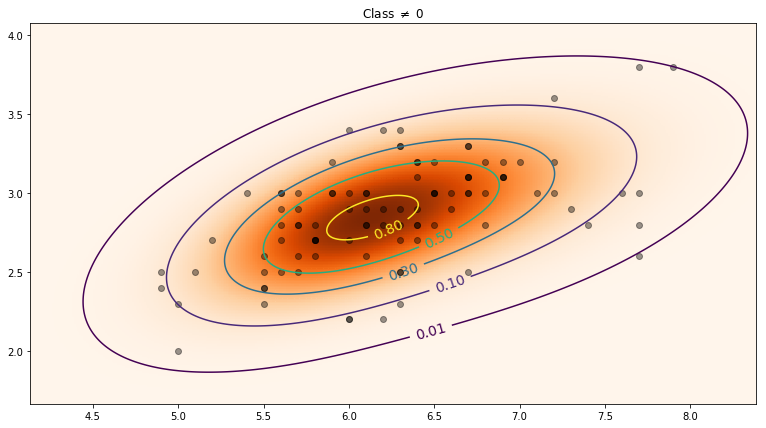

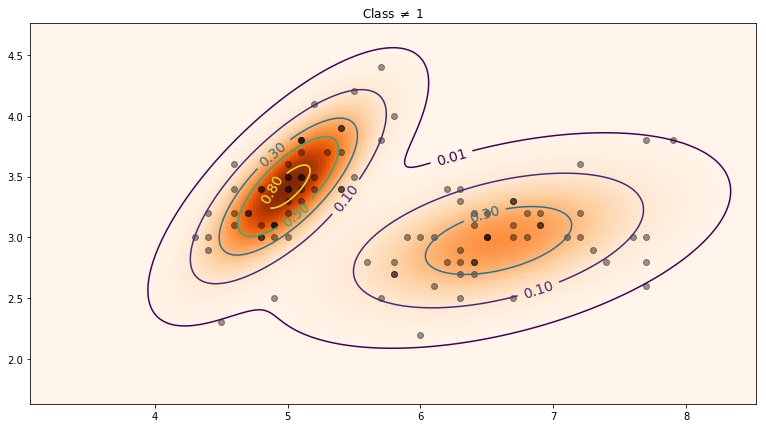

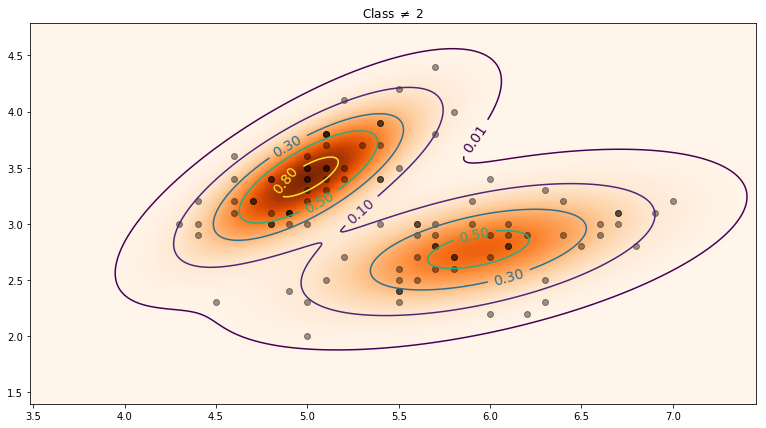

In [466]:
meanNEk = clNEk.mean(axis=1)
print(meanNEk)

for cl_id in range(means.shape[0]):
    w = abs(clNEk[cl_id, :, 0].max() - meanNEk[cl_id, 0]) * 1.3
    h = abs(clNEk[cl_id, :, 1].max() - meanNEk[cl_id, 1]) * 1.3
    grid = np.mgrid[(meanNEk[cl_id, 0] - w):(meanNEk[cl_id, 0] + w):0.01,
                    (meanNEk[cl_id, 1] - h):(meanNEk[cl_id, 1] + h):0.01]

    x, y = grid
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x 
    pos[:, :, 1] = y

    density = [distr.pdf(pos) for distr in distribs_eq_01]
    # print(density)
    del density[cl_id]
    # print(density)
    density = np.array(density).mean(axis=0)
    # print(density.shape)
    
    plt.figure(figsize=(13, 7))
    plt.title("Class $\\neq$ %d" % (cl_id))
    plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
    plt.scatter(clNEk[cl_id, :, 0], clNEk[cl_id, :, 1], alpha=0.4, color="black")
    CS = plt.contour(grid[0], grid[1], density, [0.01, 0.1, 0.3, 0.5, 0.8])
    plt.clabel(CS, fontsize=14, inline=1, fmt='%1.2f', cmap='Set3')
    plt.show()

Классифицируйте все пространство по принципу $k = \text{arg}\max\limits_k p_{X|I\{T = k\}}\left(x \left| 1\right.\right)$.
Посчитайте долю ошибок на выборке.
Нарисуйте классификацию всего пространства в проекции на пары координат (0, 1), (1, 3) и (2, 3), где закрасьте разными цветами области, которые образовались в результате классификации.

In [469]:
distribs_eq = [sps.multivariate_normal(mean=means[i], cov=covs[i])
            for i in range(means.shape[0])]

def argmax(distr, value):
    maxval = distr[0].pdf(value)
    maxarg = 0
    for k in range(means.shape[0]):
        val = distr[k].pdf(value)
        if (val > maxval):
            maxval = val
            maxarg = k
    return maxarg
        
X = data.data[:]
y = np.array([argmax(distribs_eq, value) for value in X])
print("y = ", y)
print("y == data.target : ", y == data.target)
print("accuracy = ", (y == data.target).sum() / y.shape)
print("errors = ", 1. - (y == data.target).sum() / y.shape)

y =  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
y == data.target :  [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True

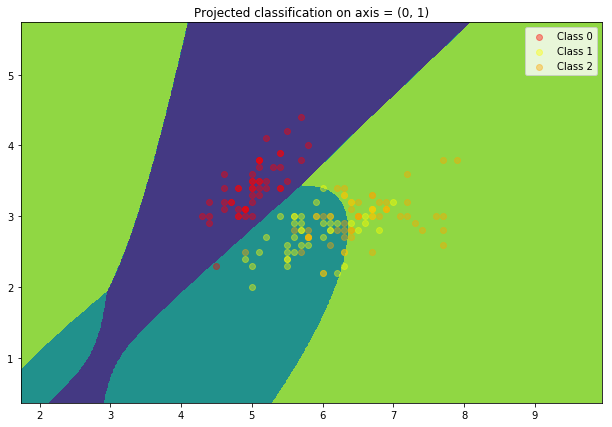

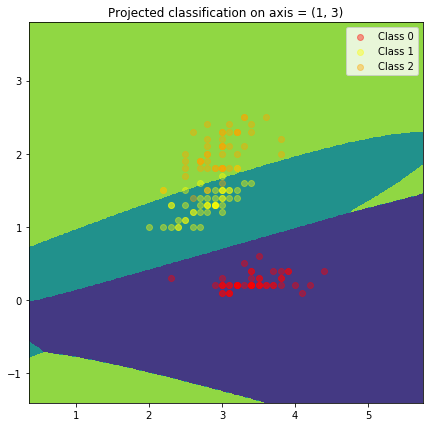

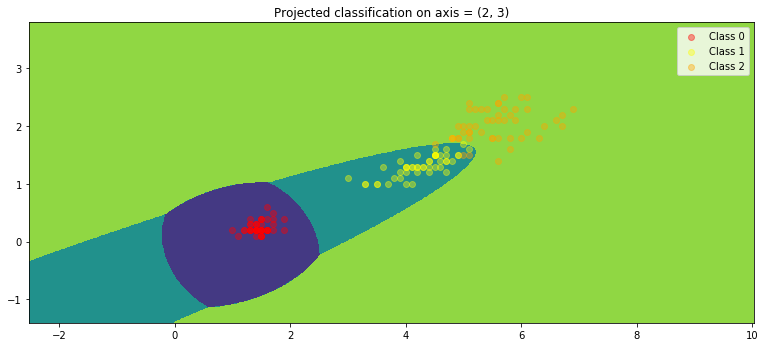

In [468]:
axes = ((0, 1), (1, 3), (2, 3))
for ax in axes:
    def meanI(i):
        return (means[i, ax[0]], means[i, ax[1]])
    def covI(i):
        return (
            (covs[i, ax[0], ax[0]], covs[i, ax[0], ax[1]]),
            (covs[i, ax[1], ax[0]], covs[i, ax[1], ax[1]])
        )

    distribs_eq_01 = [sps.multivariate_normal(mean=meanI(i), cov=covI(i))
                      for i in range(means.shape[0])]
    meanx = cl[:, :, ax[0]].mean()
    meany = cl[:, :, ax[1]].mean()
    x = cl[:, :, ax[0]].max() - meanx
    y = cl[:, :, ax[1]].max() - meany
    x = abs(x * 2)
    y = abs(y * 2)
    grid = np.mgrid[(meanx - x):(meanx + x):0.01, (meany - y):(meany + y):0.01]

    x, y = grid
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x # Здесь нет циклов!
    pos[:, :, 1] = y

    z = np.array([
                    [argmax(distribs_eq_01, (x[i, j], y[i, j]))
                        for j in range(x.shape[1])]
                    for i in range(x.shape[0])])
    # print(z)
    # print(cl.shape)
    plt.figure(figsize=(13, 7))
    plt.title("Projected classification on axis = " + str(ax))
    plt.contourf(x, y, z, np.linspace(0, 2.1, 4))
    # plt.colorbar()
    plt.axes().set_aspect(1)

    colors = ("red", "yellow", "orange")
    
    for cl_id in range(cl.shape[0]):
        plt.scatter(cl[cl_id, :, ax[0]], cl[cl_id, :, ax[1]], alpha=0.4,
                    color=colors[cl_id], label="Class %d" % (cl_id));
    plt.legend()
    plt.show()

**Вывод:** 
Мы построили множество графиков, визуализирующих условные распределения и вычислили условные матожидания распределений по оцененным значениям, но самый примечательный факт состоит в том, что мы решили задачу классификации (с учителем, т.к. была информация о начальных классах) для задачи о ирисах Фишера или они же - ирисы Андерсона, классической задачи на классификацию. Т.е. теперь, получая новые векторы - характеристики ириса, мы можем с некоторой точностью (98% на обучающей выборке, например) классифицировать его (определить принадлежность к виду, в данном случае).  Это же машинное обучение и даже не KNN! :) 

**Задача 5<font size="5" color="red">\*</font>.** В предыдущей задача информация о принадлежности наблюдения конкретной компоненте смеси была известна заранее. Как выть в случае, если такой информации нет? Задача оценки параметров распределения смеси может быть решена с помощью иттерационного EM-алгоритма.

Опишите, как работает EM-алгоритм (это обязательное условие, при котором эта задача будет проверяться). Затем примените EM-алгоритм к Ирисам Фишера и к некоторым искусственно сгенерированным датасетам. Исследуйте, как результат зависит от параметров алгоритма. Сделайте вывод.

*Разобраться в EM-алгоритме помогут:*

https://basegroup.ru/community/articles/em

http://www.machinelearning.ru/wiki/index.php?title=%D0%95%D0%9C-%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC

https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm

Bishop, C.M. Pattern Recognition and Machine Learning, глава 9.

*Реализация EM-алгоритма для смеси гауссовских распределений:*

http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture

Алгоритм представляет из себя классификатор, выполняющий классификацию без учителя, т.е. без изначальной информации, т.е. алгоритм кластеризации.

В алгоритме используется предположение, что данные есть некоторая линейна комбинация гауссовых распределений, т.е. что данные в каждом кластере подчиняются нормальному распределению, при этом алгоритм ищет оценку параметров распределений такую, что она максимизирует функцию функцию правдоподобия, которая в свою очередь считается оценкой качества модели. 

В алгоритме также считается, что каждый элемент принадлежит к каждому кластеру, на с разной вероятностью; его итоговый кластер - тот, для которого вероятность выше.

Считая распределение смеси равным $\rho(x) = \sum w_i \rho_{norm}(x | i)$, цель алгоритма - подогнать оптимальные веса W, столбцы средних и матрицу ковариаций. На матрицу ковариаций могут быть наложены ограничения - например, что она одинакова для всех распределений.

Начальные значения полагаются заданными или извне, или случайными, в т.ч. начальной матрицы ковариаций - единичной.
После этого начинается поиск оптимального значения, при этом стоит отметить, что алгоритм может остановится в локальном минимуме, что является его недостатком. 

Далее алгоритм содержит две фазы - Expectation и Maximization. Алгоритм по входным данным - наблюдениям, погрешности для изменения логарифмического правдоподобия и максимальному числу шагов (скорость сходимости может быть малой) строит упомянутые выше матрицы, из которых можно выделить отдельные нормальные распределения - а из них, как в номере выше с argmax - и сами принадлежности к классам.

Алгоритм выполняет инициализацию, а после - пока не достигнуты ограничения (число шагов, погрешность изменения правдоподобия) выполняет фазы E и M, последовательно улучшая оценку.  Дополнительнов вводится вспомогательный вектор скрытых переменных G.

Фаза E:
Вычисляется ожидаемое значение вектора скрытых переменных G по текущему приближению вектора параметров. 

Фаза М:
Решается задача максимизации правдоподобия и находится следующее приближение вектора параметров по текущим значениям векторов скрытых переменных и параметров.

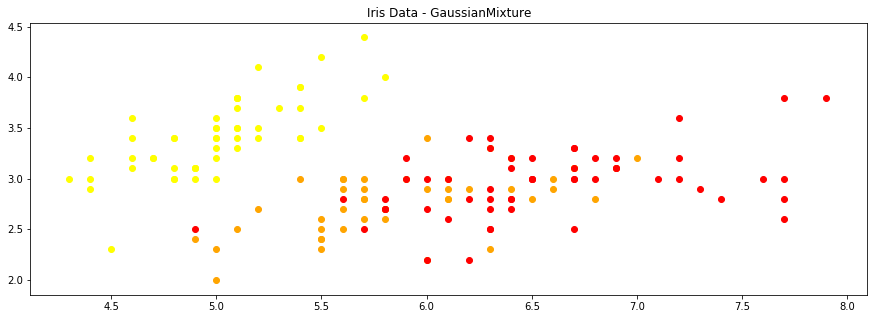

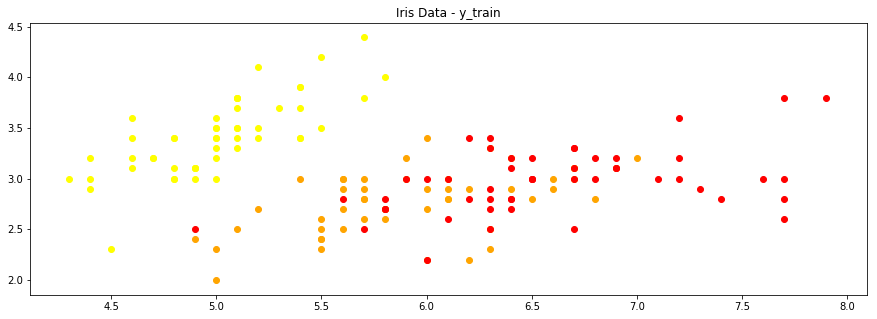

Error =  0.0333333333333


In [291]:
from sklearn.datasets import load_iris
from sklearn import mixture
data = load_iris()
X = data.data

gmm = mixture.GaussianMixture(n_components=3, covariance_type='full')
gmm.fit(X)
y_predict = gmm.predict(X)
y_train = data.target

colors = ("red", "yellow", "orange")
plt.figure(figsize=(15, 5))
plt.title("Iris Data - GaussianMixture")
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], color=colors[y_predict[i]])
plt.show()

tr = (1, 2, 0)
plt.figure(figsize=(15, 5))
plt.title("Iris Data - y_train")
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], color=colors[tr[y_train[i]]])
plt.show()

y_test_tr = np.array([tr[val] for val in y_train])
error = 1. - ((y_predict == y_test_tr).sum() / y_test.size)
print("Error = ", error)

На задаче о ирисах алгоритм показывает ошибку, мало отличающуюся от ошибки в методе выше, с известными классами.

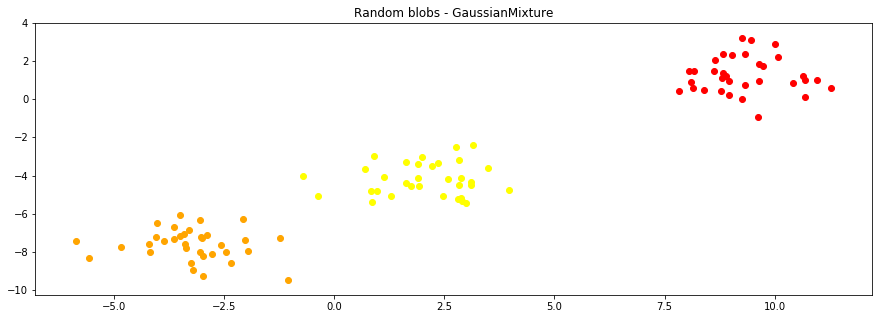

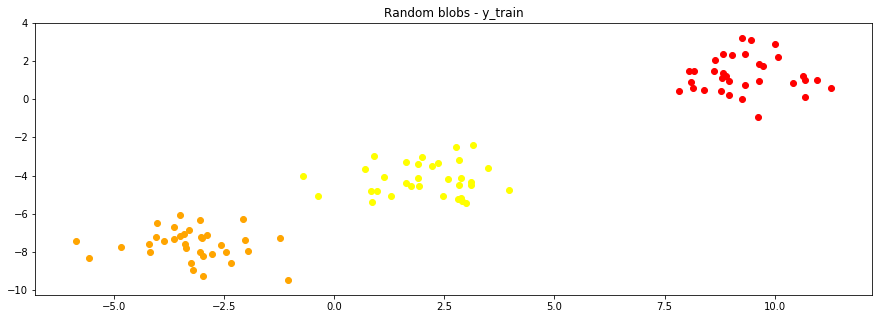

Error =  0.0


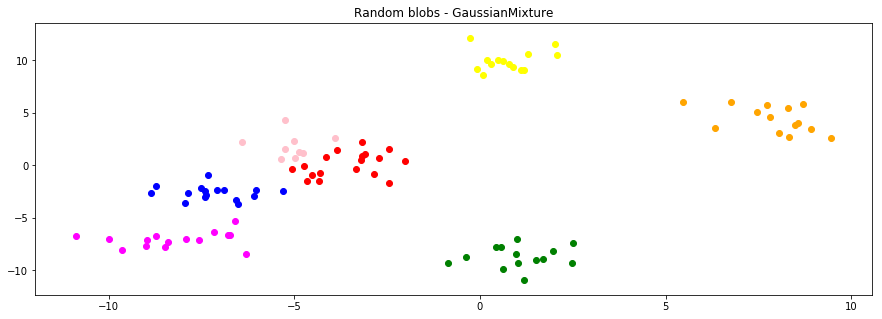

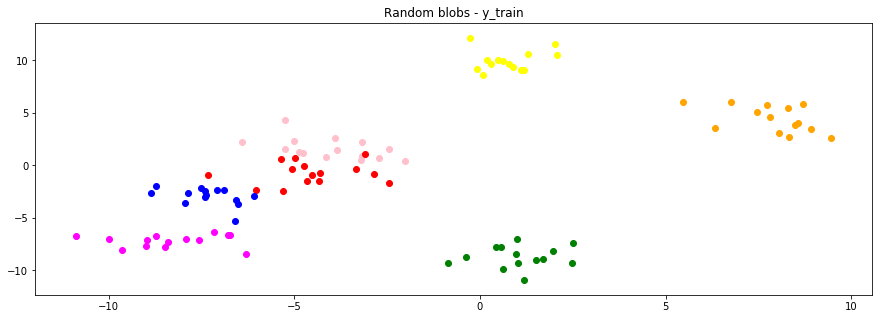

Error =  0.14


In [394]:
def brut(y_train, y_predict, N):
    tr = range(N)
    y_train_tr = np.array([tr[val] for val in y_train])
    error = 1. - ((y_predict == y_train_tr).sum() / y_train.size)
    for p in permutations(range(N)):
        y_train_tr = np.array([p[val] for val in y_train])
        new_error = 1. - ((y_predict == y_train_tr).sum() / y_train.size)
        if (new_error < error):
            error = new_error
            tr = p
    y_train_tr = np.array([tr[val] for val in y_train])
    return tr, y_train_tr, error
    
from sklearn.datasets import make_blobs
from itertools import permutations
for N in (3, 7):
    X, y_train = make_blobs(n_features=2, centers=N)

    gmm = mixture.GaussianMixture(n_components=N, covariance_type='full')
    gmm.fit(X)
    y_predict = gmm.predict(X)

    colors = ("red", "yellow", "orange", "green", "blue", "pink", "magenta")
    plt.figure(figsize=(15, 5))
    plt.title("Random blobs - GaussianMixture")
    for i in range(X.shape[0]):
        plt.scatter(X[i, 0], X[i, 1], color=colors[y_predict[i]])
    plt.show()
   
    tr, y_train_tr, error = brut(y_train, y_predict, N)
    
    plt.figure(figsize=(15, 5))
    plt.title("Random blobs - y_train")
    for i in range(X.shape[0]):
        plt.scatter(X[i, 0], X[i, 1], color=colors[tr[y_train[i]]])
    plt.show()

    print("Error = ", error)

На действительно трудноразличимых выборках появляются ошибки. Впрочем, это всё ещё выборки, более-менее похожие на нормально распределённые и алгоритм даёт приемлемый результат. Я хотел найти dataset "Микки-маус", но не нашёл, впрочем что визуально близкое можно наблюдать выше.

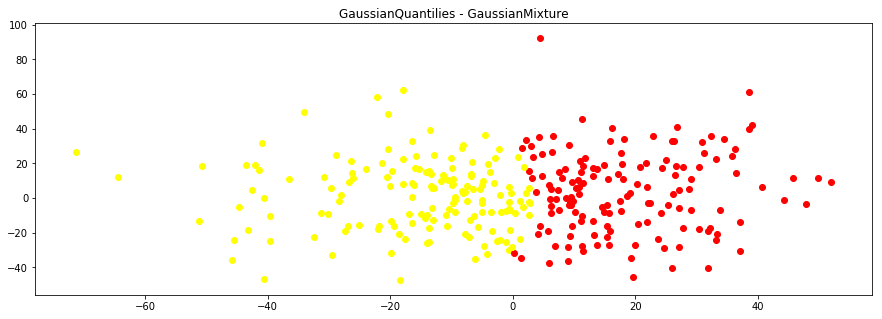

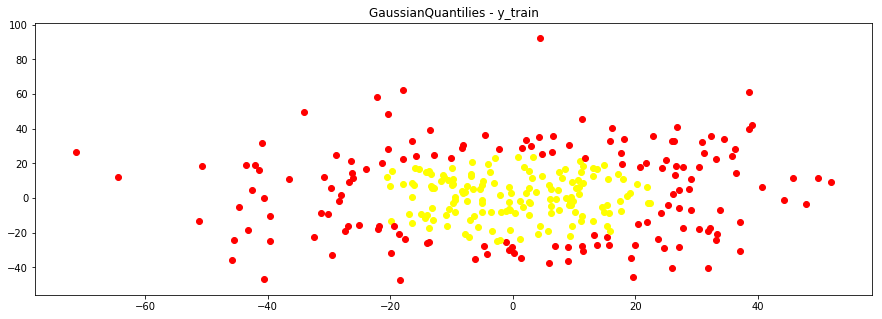

Error =  0.423333333333


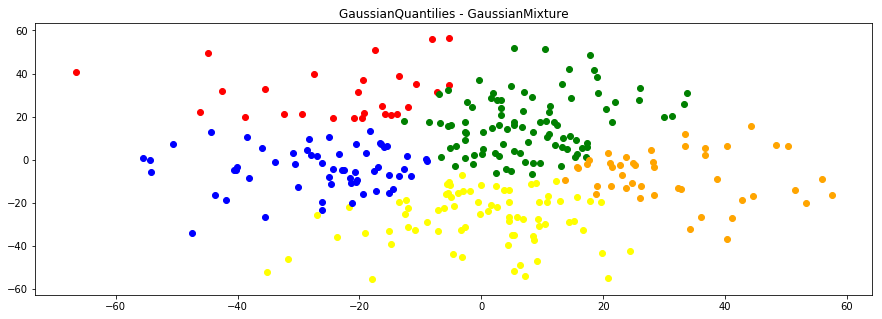

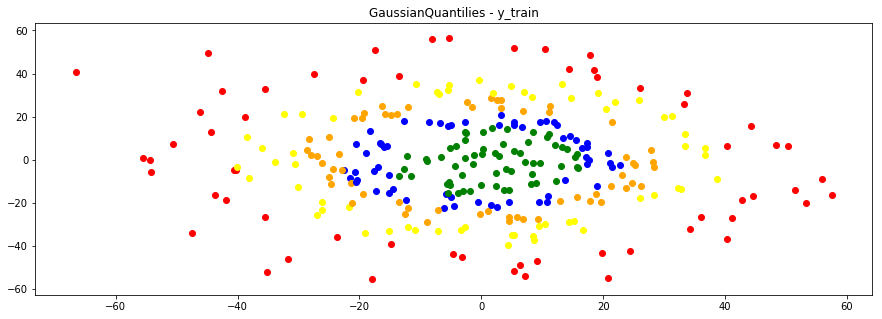

Error =  0.673333333333


In [395]:
from sklearn.datasets import make_gaussian_quantiles
from itertools import permutations
for N in (2, 5):
    X, y_train = make_gaussian_quantiles(cov=500, n_features=2, n_classes=N, n_samples=300)

    gmm = mixture.GaussianMixture(n_components=N, covariance_type='full')
    gmm.fit(X)
    y_predict = gmm.predict(X)

    colors = ("red", "yellow", "orange", "green", "blue", "pink", "magenta")
    plt.figure(figsize=(15, 5))
    plt.title("GaussianQuantilies - GaussianMixture")
    for i in range(X.shape[0]):
        plt.scatter(X[i, 0], X[i, 1], color=colors[y_predict[i]])
    plt.show()

    tr, y_train_tr, error = brut(y_train, y_predict, N)

    plt.figure(figsize=(15, 5))
    plt.title("GaussianQuantilies - y_train")
    for i in range(X.shape[0]):
        plt.scatter(X[i, 0], X[i, 1], color=colors[tr[y_train[i]]])
    plt.show()

    print("Error = ", error)

Выше приведён пример когда алгоритм НЕ применим, ибо предположение о нормальной распределённости величин НЕ верно.

Ошибки превышают 30%, т.к. алгоритм явно делает не то, что от него хотят

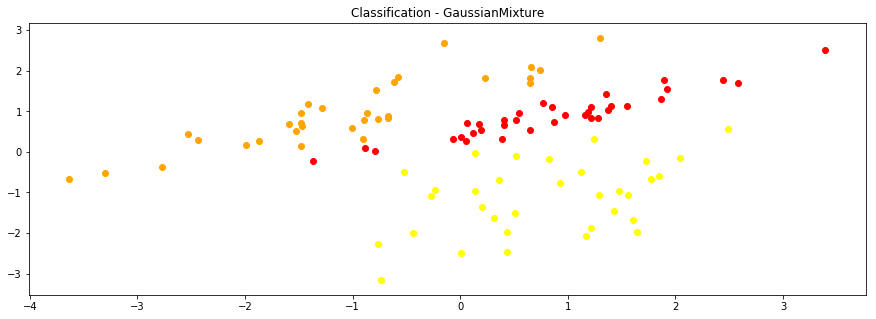

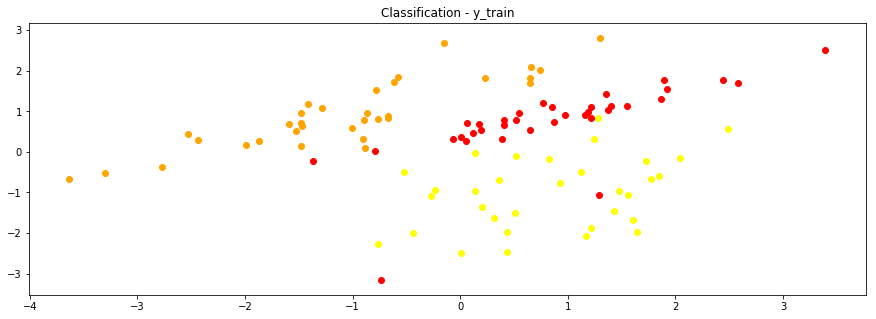

Error =  0.04


In [406]:
from sklearn.datasets import make_classification
from itertools import permutations

N = 3
X, y_train = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, n_classes=N)

gmm = mixture.GaussianMixture(n_components=N, covariance_type='full')
gmm.fit(X)
y_predict = gmm.predict(X)

colors = ("red", "yellow", "orange", "green", "blue", "pink", "magenta")
plt.figure(figsize=(15, 5))
plt.title("Classification - GaussianMixture")
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], color=colors[y_predict[i]])
plt.show()

tr, y_train_tr, error = brut(y_train, y_predict, N)

plt.figure(figsize=(15, 5))
plt.title("Classification - y_train")
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], color=colors[tr[y_train[i]]])
plt.show()

print("Error = ", error)

Алгоритм хорошо работает на пересекающихся данных, что неверно, например для K-Means.

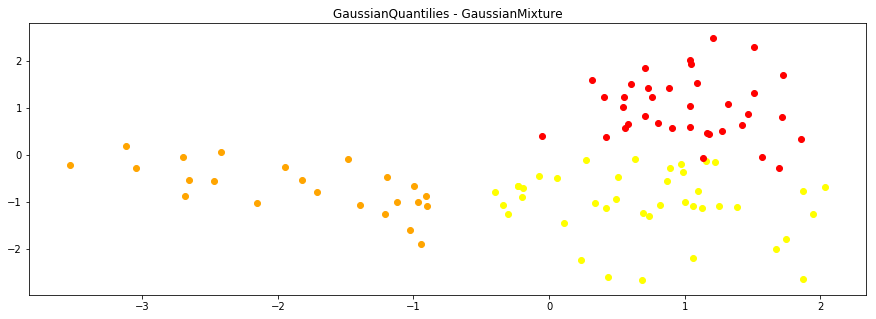

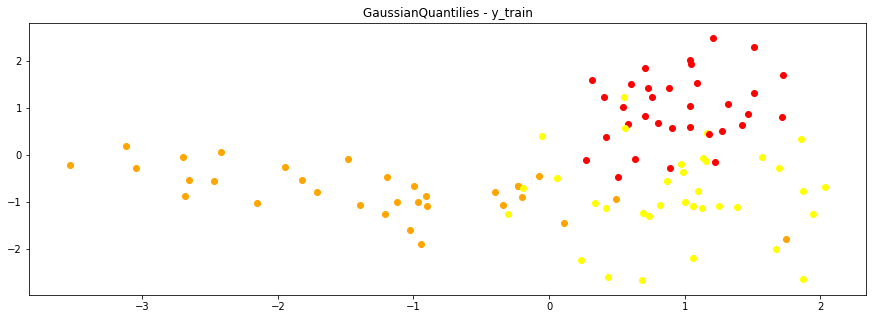

Error =  0.18


In [387]:
from sklearn.datasets import make_classification
from itertools import permutations

N = 3
X, y_train = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, n_classes=N)

gmm = mixture.GaussianMixture(n_components=N, covariance_type='tied')
gmm.fit(X)
y_predict = gmm.predict(X)

colors = ("red", "yellow", "orange", "green", "blue", "pink", "magenta")
plt.figure(figsize=(15, 5))
plt.title("Classification - GaussianMixture")
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], color=colors[y_predict[i]])
plt.show()

tr, y_train_tr = brut(y_train, y_predict, N)

plt.figure(figsize=(15, 5))
plt.title("Classification - y_train")
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], color=colors[tr[y_train[i]]])
plt.show()

print("Error = ", error)

При выставлении параметра covariance_type в 'tied' алгоритм пытается разбивать на примерно похожие классы, что не всегда верно. Можно получить логичные результаты при использовании других:  {‘full’, ‘tied’, ‘diag’, ‘spherical’} Разумно использовать spherical, когда кластеры - что-то по форме в виде сферы.

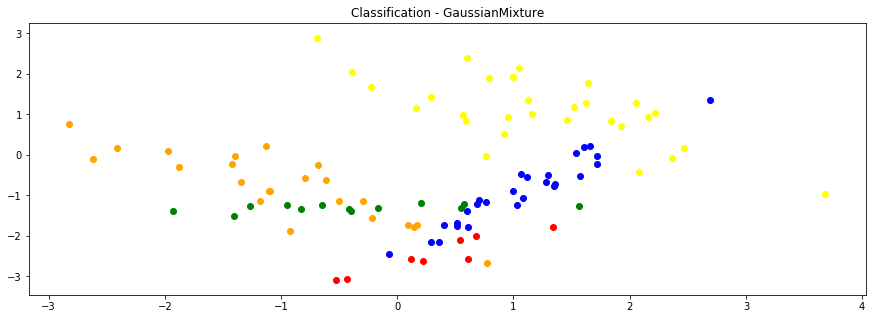

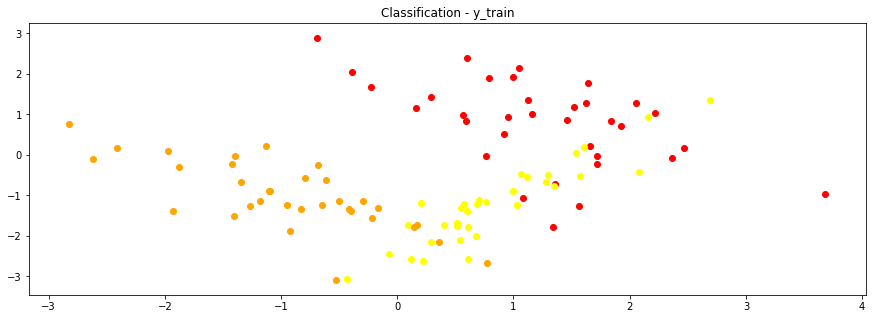

In [411]:
from sklearn.datasets import make_classification
from itertools import permutations

N = 3
X, y_train = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, n_classes=N)

gmm = mixture.GaussianMixture(n_components=N + 2, covariance_type='full')
gmm.fit(X)
y_predict = gmm.predict(X)

colors = ("red", "yellow", "orange", "green", "blue", "pink", "magenta")
plt.figure(figsize=(15, 5))
plt.title("Classification - GaussianMixture")
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], color=colors[y_predict[i]])
plt.show()

plt.figure(figsize=(15, 5))
plt.title("Classification - y_train")
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], color=colors[tr[y_train[i]]])
plt.show()


При увеличении числа классов алгоритм пытается искать овалы нормальных распределений там, где они не совсем уместны, что логично, учитывая предположения алгоритма.

/usr/local/lib/python3.5/dist-packages/sklearn/mixture/base.py:237: ConvergenceWarning: Initialization 1 did not converged. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


[0.47333333333333338, 0.053333333333333344, 0.046666666666666634, 0.040000000000000036, 0.026666666666666616, 0.026666666666666616, 0.013333333333333308, 0.013333333333333308, 0.020000000000000018, 0.020000000000000018, 0.026666666666666616, 0.026666666666666616, 0.026666666666666616, 0.033333333333333326, 0.033333333333333326, 0.033333333333333326, 0.033333333333333326, 0.033333333333333326]


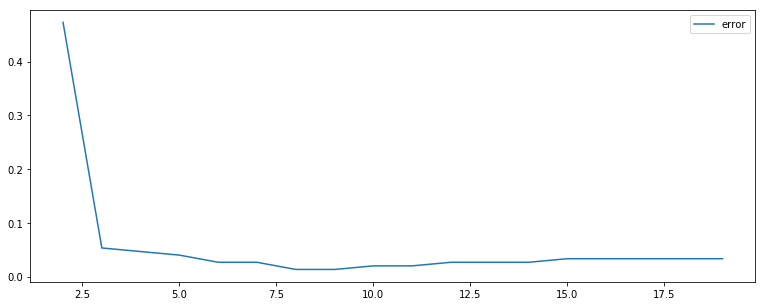

In [465]:
N = 3

data = load_iris()
X = np.array(data.data)
y_train = np.array(data.target)

errors = []
grid = np.array(range(18)) + 2
for iters in grid:
    gmm = mixture.GaussianMixture(n_components=N, covariance_type='full', max_iter=iters)
    gmm.fit(X)
    y_predict = gmm.predict(X)

    '''
    colors = ("red", "yellow", "orange")
    plt.figure(figsize=(15, 5))
    plt.title("Iris Data - GaussianMixture")
    for i in range(X.shape[0]):
        plt.scatter(X[i, 0], X[i, 1], color=colors[y_predict[i]])
    plt.show()
    '''
    tr, y_train_tr, error = brut(y_train, y_predict, N)
    
    '''
    plt.figure(figsize=(15, 5))
    plt.title("Iris Data - y_train")
    for i in range(X.shape[0]):
        plt.scatter(X[i, 0], X[i, 1], color=colors[tr[y_train[i]]])
    plt.show()
    '''

    errors.append(error)
print(errors)
plt.figure(figsize=(13,5))
plt.plot(grid, errors, label="error")
plt.legend()
plt.show()


Выше построен график ошибки (%) в зависимости от числа итераций.

**Вывод:** 
EM - алгоритм, являющийся более общим случаем K-Means и улучщающий его - мощный алгоритм кластеризации (классификации без учителя), хорошо работающий на данных, в которох выполнены предположения алгоритма. Более того, некоторые реализации имеют линейную временную сложность от входных данных.
